In [1]:
!gdown https://drive.google.com/uc?id=1qeX9hsO3lnVwmJDXJtl430ojrmM_rhmo
!unzip project.zip
%cd project

Downloading...
From (original): https://drive.google.com/uc?id=1qeX9hsO3lnVwmJDXJtl430ojrmM_rhmo
From (redirected): https://drive.google.com/uc?id=1qeX9hsO3lnVwmJDXJtl430ojrmM_rhmo&confirm=t&uuid=51d48a09-4aa2-4344-981c-5da1686d445e
To: /content/project.zip
100% 1.52G/1.52G [00:27<00:00, 55.1MB/s]
Archive:  project.zip
   creating: project/
   creating: project/untitled folder/
  inflating: project/.DS_Store       
  inflating: __MACOSX/project/._.DS_Store  
  inflating: project/project.ipynb   
   creating: project/A. Segmentation/
  inflating: __MACOSX/project/._A. Segmentation  
   creating: project/.git/
   creating: project/C. Localization/
  inflating: __MACOSX/project/._C. Localization  
   creating: project/B. Disease Grading/
  inflating: __MACOSX/project/._B. Disease Grading  
  inflating: project/untitled folder/C. Localization.zip  
  inflating: __MACOSX/project/untitled folder/._C. Localization.zip  
  inflating: project/untitled folder/A. Segmentation.zip  
  inflating: _

In [2]:
import PIL
from PIL import Image
import numpy as np
import pandas as pd

import imageio
import imgaug as ia
import imgaug.augmenters as iaa
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib

import plotly.offline as pyo
pyo.init_notebook_mode()
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from sklearn import preprocessing
import random
import tensorflow as tf
import warnings
warnings.filterwarnings("ignore")
#!pip install visualkeras

from matplotlib import image
from matplotlib import pyplot

def Create_Directory_DataFrame():
    df_list = []
    basedir = 'A. Segmentation/1. Original Images/'

    for Class in os.listdir(basedir):
        class_dir = os.path.join(basedir, Class)
        if os.path.isdir(class_dir):
            for location in os.listdir(class_dir):
                if location.endswith('.jpg'):

                    class_name = Class.split('.')[1].strip() if '.' in Class else Class
                    image_id = location.split('.')[0].split('_')[1]
                    df_list.append({
                        'Class': class_name,
                        'Location': os.path.join(class_dir, location),
                        'ID': image_id
                    })


    df = pd.DataFrame(df_list)
    df = df.sample(frac=1).reset_index(drop=True)
    return df

df1 = Create_Directory_DataFrame()
print(df1.shape)
df1.head()


(81, 3)


Class                                           Location  ID
0  Training Set  A. Segmentation/1. Original Images/a. Training...  03
1  Training Set  A. Segmentation/1. Original Images/a. Training...  51
2  Training Set  A. Segmentation/1. Original Images/a. Training...  47
3  Training Set  A. Segmentation/1. Original Images/a. Training...  19
4  Training Set  A. Segmentation/1. Original Images/a. Training...  16

In [3]:
import pandas as pd
import os

def Create_Directory_DataFrame():
    records = []
    basedir = 'A. Segmentation/2. All Segmentation Groundtruths'

    for Class in os.listdir(basedir):
        class_path = os.path.join(basedir, Class)
        if os.path.isdir(class_path):
            for SubClass in os.listdir(class_path):
                subclass_path = os.path.join(class_path, SubClass)
                if os.path.isdir(subclass_path):
                    for filename in os.listdir(subclass_path):
                        if filename.endswith('.tif'):
                            record = {
                                'Class': Class,
                                'SubClass': SubClass,
                                'Location': os.path.join(subclass_path, filename),
                                'ID': filename.split('.')[0].split('_')[1]
                            }
                            records.append(record)

    df = pd.DataFrame.from_records(records)
    df = df.sample(frac=1).reset_index(drop=True)
    return df

df = Create_Directory_DataFrame()
print(df.shape)
df.head()


(363, 4)


Class           SubClass  \
0   b. Testing Set      5. Optic Disc   
1   b. Testing Set      5. Optic Disc   
2   b. Testing Set  1. Microaneurysms   
3   b. Testing Set  1. Microaneurysms   
4  a. Training Set      5. Optic Disc   

                                            Location  ID  
0  A. Segmentation/2. All Segmentation Groundtrut...  57  
1  A. Segmentation/2. All Segmentation Groundtrut...  69  
2  A. Segmentation/2. All Segmentation Groundtrut...  74  
3  A. Segmentation/2. All Segmentation Groundtrut...  73  
4  A. Segmentation/2. All Segmentation Groundtrut...  22

In [4]:
df.groupby(['SubClass']).count()

Class  Location  ID
SubClass                              
1. Microaneurysms     81        81  81
2. Haemorrhages       80        80  80
3. Hard Exudates      81        81  81
4. Soft Exudates      40        40  40
5. Optic Disc         81        81  81

In [5]:
fdf = pd.merge(df, df1, left_on='ID', right_on='ID')
fdf.head()

Class_x           SubClass  \
0  b. Testing Set      5. Optic Disc   
1  b. Testing Set    2. Haemorrhages   
2  b. Testing Set  1. Microaneurysms   
3  b. Testing Set   3. Hard Exudates   
4  b. Testing Set      5. Optic Disc   

                                          Location_x  ID      Class_y  \
0  A. Segmentation/2. All Segmentation Groundtrut...  57  Testing Set   
1  A. Segmentation/2. All Segmentation Groundtrut...  57  Testing Set   
2  A. Segmentation/2. All Segmentation Groundtrut...  57  Testing Set   
3  A. Segmentation/2. All Segmentation Groundtrut...  57  Testing Set   
4  A. Segmentation/2. All Segmentation Groundtrut...  69  Testing Set   

                                          Location_y  
0  A. Segmentation/1. Original Images/b. Testing ...  
1  A. Segmentation/1. Original Images/b. Testing ...  
2  A. Segmentation/1. Original Images/b. Testing ...  
3  A. Segmentation/1. Original Images/b. Testing ...  
4  A. Segmentation/1. Original Images/b. Testing ...

In [6]:
print(fdf['SubClass'].unique())

['5. Optic Disc' '2. Haemorrhages' '1. Microaneurysms' '3. Hard Exudates'
 '4. Soft Exudates']


In [7]:
#w,h = 2848,4288
w,h=512,512
from tqdm import tqdm
def load_img(addr,w,h):
    img = cv2.imread(addr,0)
    img = cv2.resize(img, (w,h), interpolation = cv2.INTER_AREA)
    img = img.reshape(w,h,1)
    return img

def load_mask(addr, w, h):
    im = Image.open(addr)
    imarray = np.array(im)
    # Convert to grayscale if the image is RGB
    if len(imarray.shape) == 3:  # Checks if the image has 3 dimensions (h, w, c)
        imarray = cv2.cvtColor(imarray, cv2.COLOR_RGB2GRAY)
    img = cv2.resize(imarray, (w, h), interpolation=cv2.INTER_AREA)
    # Ensure the image has a channel dimension
    img = np.expand_dims(img, axis=-1)
    return img


def load_data(df,w,h):
    Image = []
    Masks = []
    for i in tqdm(df.index):
        Image.append(load_img(df.loc[i]['Location_x'],w,h))
        Masks.append(load_mask(df.loc[i]['Location_y'],w,h))
    return np.float32(np.array(Image)) , np.float32(np.array(Masks))

segment_choice = '2. Haemorrhages'
seg_df = fdf[fdf['SubClass'] ==  segment_choice]
print(seg_df.shape)
seg_df.head()


(80, 6)


Class_x         SubClass  \
1    b. Testing Set  2. Haemorrhages   
6    b. Testing Set  2. Haemorrhages   
10   b. Testing Set  2. Haemorrhages   
14   b. Testing Set  2. Haemorrhages   
19  a. Training Set  2. Haemorrhages   

                                           Location_x  ID       Class_y  \
1   A. Segmentation/2. All Segmentation Groundtrut...  57   Testing Set   
6   A. Segmentation/2. All Segmentation Groundtrut...  69   Testing Set   
10  A. Segmentation/2. All Segmentation Groundtrut...  74   Testing Set   
14  A. Segmentation/2. All Segmentation Groundtrut...  73   Testing Set   
19  A. Segmentation/2. All Segmentation Groundtrut...  22  Training Set   

                                           Location_y  
1   A. Segmentation/1. Original Images/b. Testing ...  
6   A. Segmentation/1. Original Images/b. Testing ...  
10  A. Segmentation/1. Original Images/b. Testing ...  
14  A. Segmentation/1. Original Images/b. Testing ...  
19  A. Segmentation/1. Original Images/a. Training...

(2848, 4288, 3)


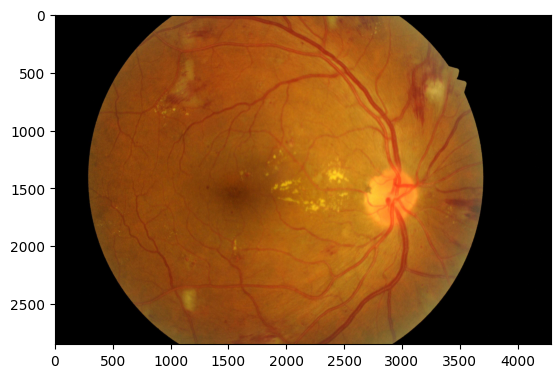

In [8]:
from PIL import Image
im = Image.open(fdf.iloc[21,5])
imarray = np.array(im)
plt.imshow(imarray)
print(imarray.shape)

(2848, 4288, 3)


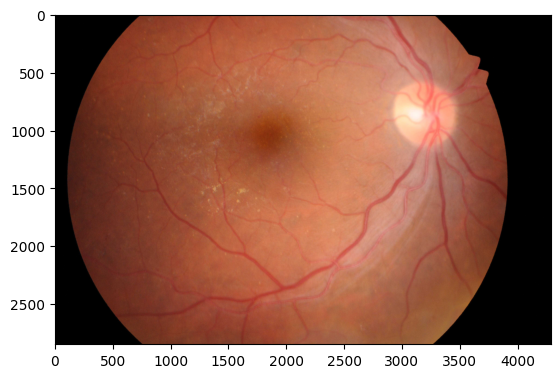

In [9]:
from PIL import Image
im = Image.open(fdf.iloc[1,5])
imarray = np.array(im)
plt.imshow(imarray)
print(imarray.shape)

In [10]:
X, Y = load_data(seg_df,w,h)

100%|██████████| 80/80 [00:11<00:00,  6.87it/s]


In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.15, random_state=42)

In [12]:
!pip install -U -q segmentation-models
!pip install -q tensorflow==2.2.1
!pip install -q keras==2.5
import os
os.environ["SM_FRAMEWORK"] = "tf.keras"

from tensorflow import keras
import segmentation_models as sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 4.3 MB/s eta 0:00:00
ERROR: Could not find a version that satisfies the requirement tensorflow==2.2.1 (from versions: 2.8.0rc0, 2.8.0rc1, 2.8.0, 2.8.1, 2.8.2, 2.8.3, 2.8.4, 2.9.0rc0, 2.9.0rc1, 2.9.0rc2, 2.9.0, 2.9.1, 2.9.2, 2.9.3, 2.10.0rc0, 2.10.0rc1, 2.10.0rc2, 2.10.0rc3, 2.10.0, 2.10.1, 2.11.0rc0, 2.11.0rc1, 2.11.0rc2, 2.11.0, 2.11.1, 2.12.0rc0, 2.12.0rc1, 2.12.0, 2.12.1, 2.13.0rc0, 2.13.0rc1, 2.13.0rc2, 2.13.0, 2.13.1, 2.14.0rc0, 2.14.0rc1, 2.14.0, 2.14.1, 2.15.0rc0, 2.15.0rc1, 2.15.0, 2.15.0.post1, 2.15.1, 2.16.0rc0, 2.16.1)
ERROR: No matching distribution found for tensorflow==2.2.1
ERROR: Could not find a version that satisfies the requirement keras==2.5 (from versions: 0.2.0, 0.3.0, 0.3.1, 0.3.2, 0.3.3, 1.0.0, 1.0.1, 1.0.2, 1.0.3, 1.0.4, 1.0.5, 1.0.6, 1.0.7, 1.0.8, 1.1.0, 1.1.1, 1.1.2, 1.2.0, 1.2.1, 1.2.2, 2.0.0, 2.0.1, 2.0.2, 2.0.3, 2.0.4, 2.0.5, 2.0.6, 2.0.7, 2.0.8, 2.0.9, 2.1.0, 2.1.1, 2.1.2, 2.1.3, 2.1.4, 2.1.5, 2.1

In [13]:
import segmentation_models as sm
BACKBONE = 'inceptionv3'
preprocess_input = sm.get_preprocessing(BACKBONE)

In [14]:
BATCH_SIZE = 8
CLASSES = ['Retinal']
LR = 0.0001
EPOCHS = 40
preprocess_input = sm.get_preprocessing(BACKBONE)
# define network parameters
n_classes = 1 if len(CLASSES) == 1 else (len(CLASSES) + 1)  # case for binary and multiclass segmentation
activation = 'sigmoid' if n_classes == 1 else 'softmax'
#create model
model = sm.Unet(BACKBONE,input_shape=(w,h, 1),encoder_weights=None, classes=n_classes, activation=activation)

In [15]:
# define optomizer
optim = tf.keras.optimizers.Adam(LR)
# Segmentation models losses can be combined together by '+' and scaled by integer or float factor
dice_loss = sm.losses.DiceLoss()
focal_loss = sm.losses.BinaryFocalLoss() if n_classes == 1 else sm.losses.CategoricalFocalLoss()
total_loss = 0.9*dice_loss + (0.1 * focal_loss)
# actulally total_loss can be imported directly from library, above example just show you how to manipulate with losses
# total_loss = sm.losses.binary_focal_dice_loss # or sm.losses.categorical_focal_dice_loss
metrics = [sm.metrics.IOUScore(threshold=0.5), sm.metrics.FScore(threshold=0.5)]
# compile keras model with defined optimozer, loss and metrics
model.compile(optim, total_loss, metrics)

In [16]:
history =  model.fit(
   x=X,
   y=Y,
   batch_size=16,
   epochs=200,
   validation_data=(X_valid,y_valid),
)

Epoch 1/200
5/5 [==============================] - 62s 2s/step - loss: -1.4258 - iou_score: 2.7500 - f1-score: 1.4227 - val_loss: -0.5075 - val_iou_score: 0.2711 - val_f1-score: 0.4265
Epoch 2/200
5/5 [==============================] - 1s 213ms/step - loss: -2.6338 - iou_score: 3.7623 - f1-score: 1.5780 - val_loss: -0.5562 - val_iou_score: 0.1980 - val_f1-score: 0.3306
Epoch 3/200
5/5 [==============================] - 1s 212ms/step - loss: -3.6709 - iou_score: 3.4002 - f1-score: 1.5451 - val_loss: -0.5226 - val_iou_score: 0.1570 - val_f1-score: 0.2714
Epoch 4/200
5/5 [==============================] - 1s 213ms/step - loss: -4.4566 - iou_score: 3.8327 - f1-score: 1.5860 - val_loss: -0.4586 - val_iou_score: 0.1331 - val_f1-score: 0.2349
Epoch 5/200
5/5 [==============================] - 1s 214ms/step - loss: -5.0771 - iou_score: 4.5788 - f1-score: 1.6402 - val_loss: -0.3721 - val_iou_score: 0.1133 - val_f1-score: 0.2036
Epoch 6/200
5/5 [==============================] - 1s 212ms/step - 

In [17]:
from tensorflow.keras.models import model_from_json
model_json = model.to_json()
name = BACKBONE+'_Retinal'
with open(name+".json", "w") as json_file:
    json_file.write(model_json)
model.save_weights(name+".h5")
import pandas as pd
hist_df = pd.DataFrame(history.history)
hist_df.to_csv(name+'.csv',index = False)
hist_df.tail()

loss  iou_score  f1-score   val_loss  val_iou_score  val_f1-score
195 -69.936905  61.559193  1.967903 -66.618980      55.944889      1.964878
196 -69.583023  61.337616  1.967588 -73.848206      57.850868      1.966015
197 -70.821487  63.534748  1.968905 -70.123360      56.422276      1.965170
198 -70.446556  59.966839  1.967120 -73.452278      49.960358      1.960753
199 -70.597786  61.185150  1.967601 -65.548897      49.659218      1.960520

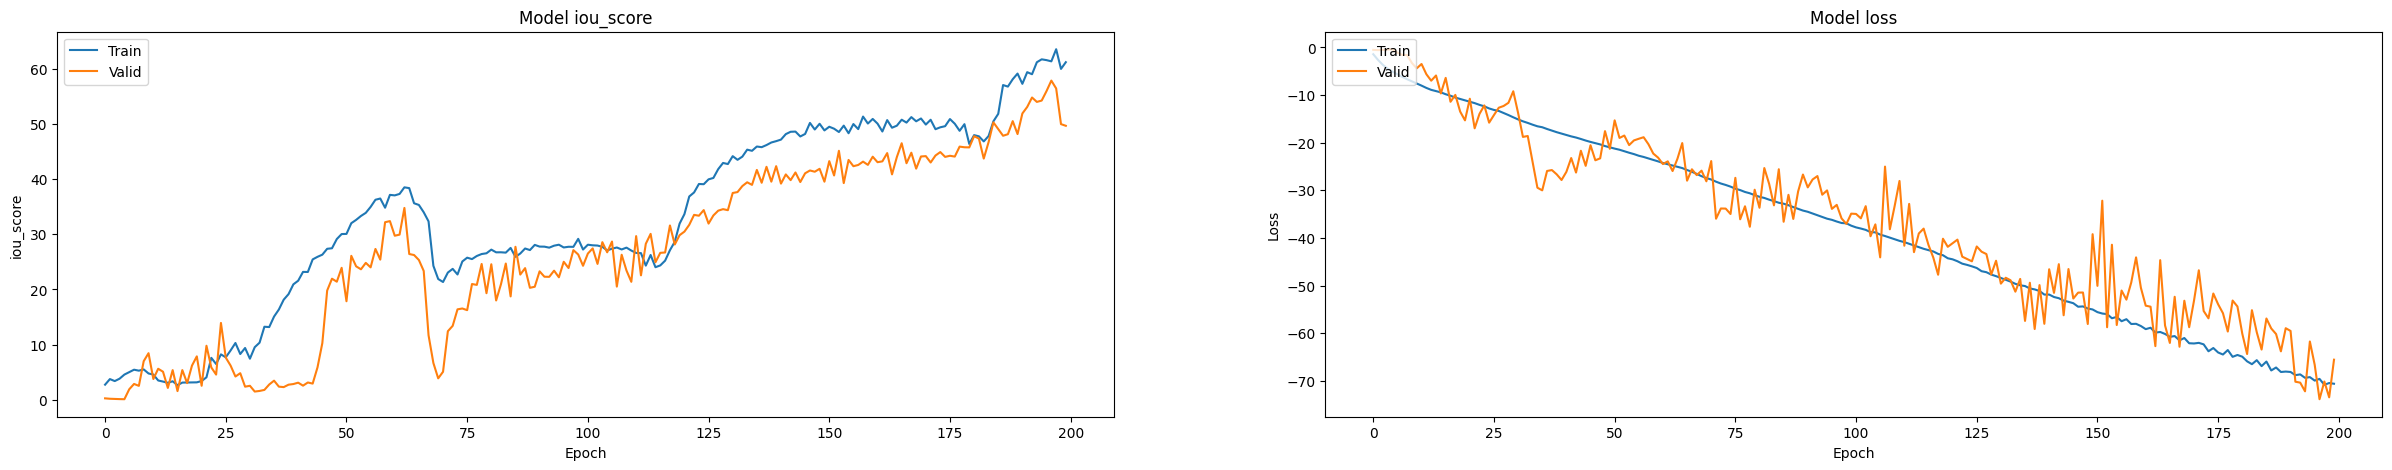

In [18]:
# Plot training & validation iou_score values
plt.figure(figsize=(30, 5))
plt.subplot(121)
plt.plot(history.history['iou_score'])
plt.plot(history.history['val_iou_score'])
plt.title('Model iou_score')
plt.ylabel('iou_score')
plt.xlabel('Epoch')
plt.legend(['Train', 'Valid'], loc='upper left')

# Plot training & validation loss values
plt.subplot(122)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Valid'], loc='upper left')
plt.show()

In [19]:
df_op = fdf.sample(n = 16)
X_op ,  Y_op = load_data(df_op,w,h)
print(df_op.shape)
df_op.head()

100%|██████████| 16/16 [00:02<00:00,  6.07it/s]

(16, 6)


Class_x          SubClass  \
188  a. Training Set     5. Optic Disc   
116   b. Testing Set  4. Soft Exudates   
101   b. Testing Set  3. Hard Exudates   
50   a. Training Set     5. Optic Disc   
211  a. Training Set   2. Haemorrhages   

                                            Location_x  ID       Class_y  \
188  A. Segmentation/2. All Segmentation Groundtrut...  27  Training Set   
116  A. Segmentation/2. All Segmentation Groundtrut...  60   Testing Set   
101  A. Segmentation/2. All Segmentation Groundtrut...  64   Testing Set   
50   A. Segmentation/2. All Segmentation Groundtrut...  42  Training Set   
211  A. Segmentation/2. All Segmentation Groundtrut...  20  Training Set   

                                            Location_y  
188  A. Segmentation/1. Original Images/a. Training...  
116  A. Segmentation/1. Original Images/b. Testing ...  
101  A. Segmentation/1. Original Images/b. Testing ...  
50   A. Segmentation/1. Original Images/a. Training...  
211  A. Segmentation/1. Original Images/a. Training...

1/1 [==============================] - 7s 7s/step


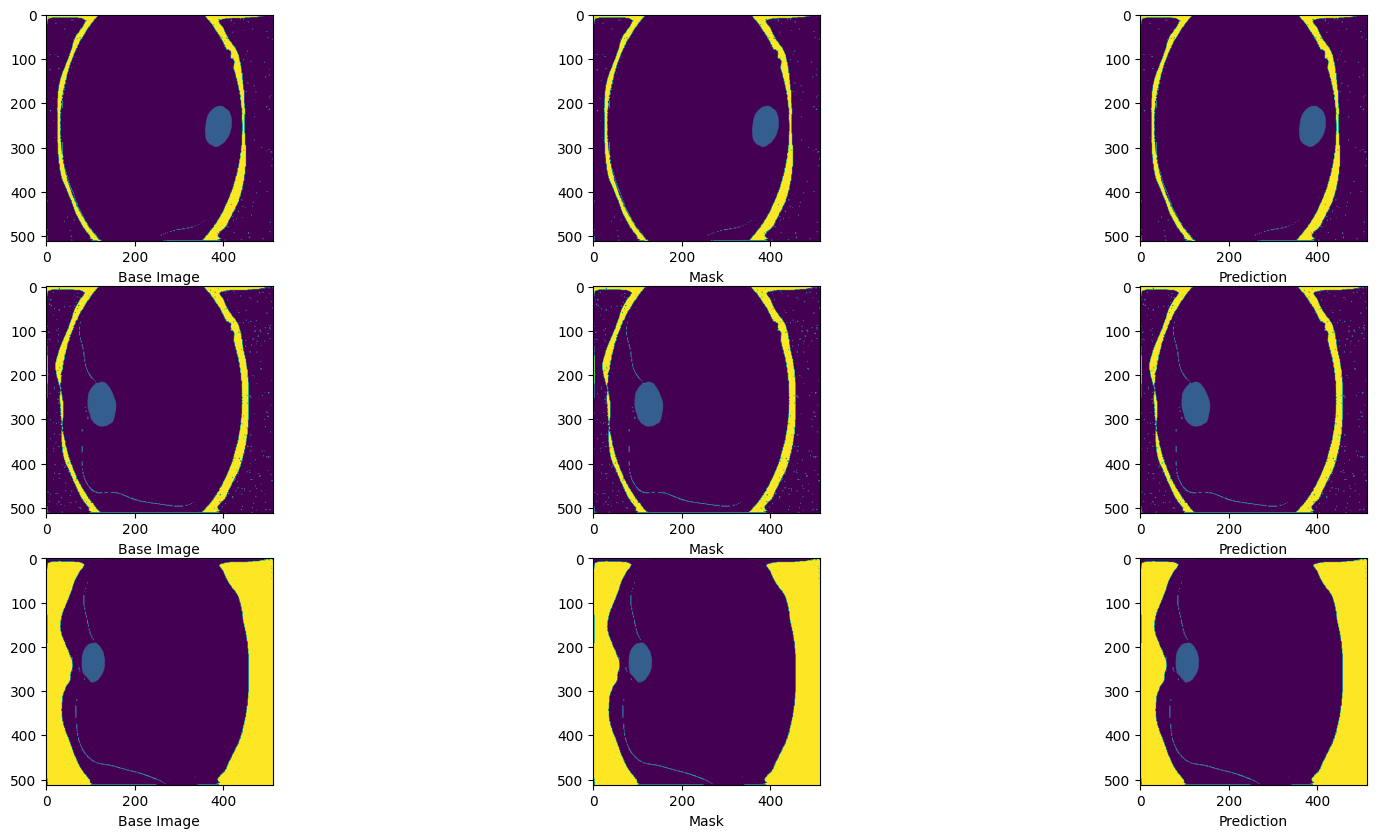

In [20]:
preds = model.predict(X_op).round()
plt.figure(figsize=(20,10))
for i in range(0,9,3):
    plt.subplot(3,3,i+1)
    img = X_op[i].reshape(w,h)
    yop = Y_op[i].reshape(w,h)
    prd = preds[i][..., 0].squeeze()
    img = img.astype('uint8')
    yop = yop.astype('uint8')
    prd = prd.astype('uint8')
    im = cv2.bitwise_not(img, img, mask=yop)
    pim = cv2.bitwise_not(img, img, mask=prd)
    plt.imshow(img)
    plt.xlabel("Base Image")


    plt.subplot(3,3,i+2)
    plt.imshow(im)
    plt.xlabel("Mask")

    plt.subplot(3,3,i+3)
    plt.imshow(pim)
    plt.xlabel("Prediction")

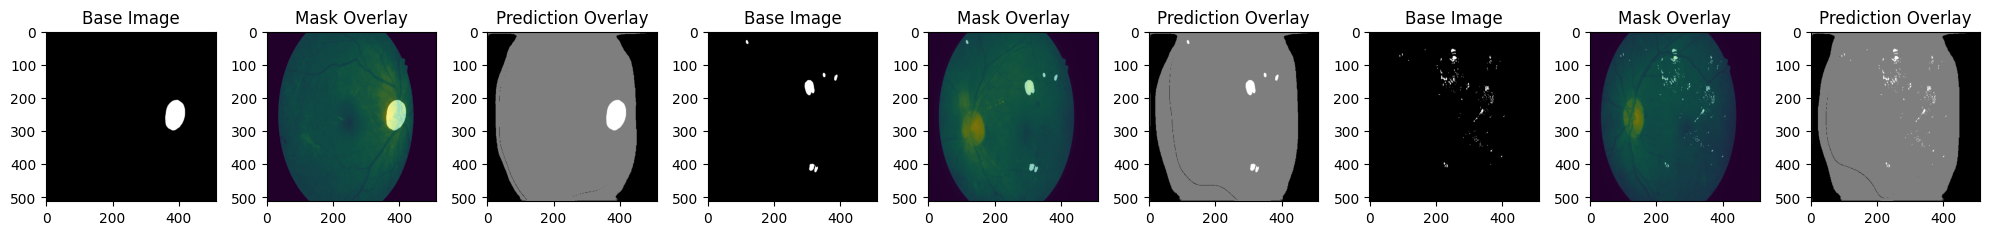

In [21]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(20,10))

for i in range(9):
    idx = i // 3  # Calculate index for accessing images and masks
    plt.subplot(3, 9, i + 1)

    if i % 3 == 0:  # Base Image
        img = X_op[idx].squeeze().astype('uint8')
        plt.imshow(img, cmap='gray')
        plt.title("Base Image")
    elif i % 3 == 1:  # Mask Overlay
        mask = Y_op[idx].astype('uint8')
        plt.imshow(img, cmap='gray')  # Show the base image in grayscale
        plt.imshow(mask, alpha=0.5)  # Overlay the RGB mask with transparency
        plt.title("Mask Overlay")
    else:  # Prediction Overlay
        pred = preds[idx][..., 0].squeeze().astype('uint8')
        plt.imshow(img, cmap='gray')  # Show the base image in grayscale
        plt.imshow(pred, cmap='gray', alpha=0.5)  # Overlay the prediction with transparency
        plt.title("Prediction Overlay")

plt.tight_layout()
plt.show()


In [24]:
# Save the model architecture & weights
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

model.save_weights("model_weights.h5")
print("Model saved to disk.")


Model saved to disk.


In [25]:
from tensorflow.keras.models import model_from_json

# Load model
with open('model.json', 'r') as json_file:
    loaded_model_json = json_file.read()

loaded_model = model_from_json(loaded_model_json)
loaded_model.load_weights("model_weights.h5")
print("Loaded model from disk")

# Compile model again (necessary after loading)
loaded_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


Loaded model from disk


In [26]:
# Assuming you have test data prepared (X_test, Y_test)
eval_result = loaded_model.evaluate(X_op, Y_op)
print(f"Test Loss: {eval_result[0]}, Test Accuracy: {eval_result[1]}")


1/1 [==============================] - 3s 3s/step - loss: -955.3102 - accuracy: 0.1383
Test Loss: -955.3101806640625, Test Accuracy: 0.13827133178710938


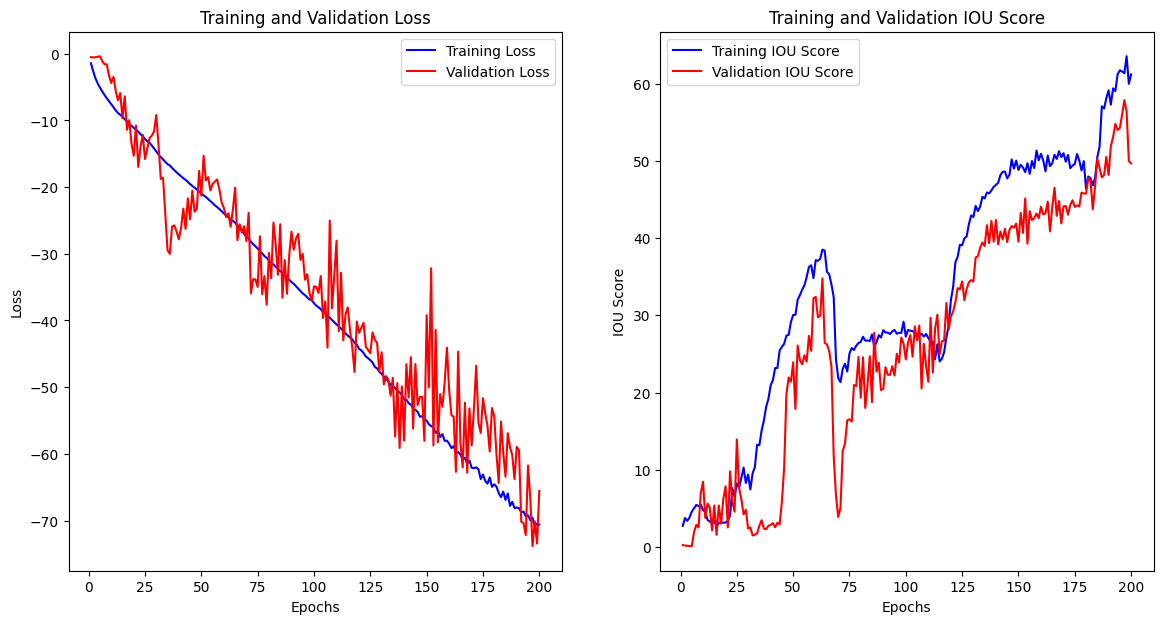

In [27]:
import matplotlib.pyplot as plt

# Plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
plt.plot(epochs, loss, 'b-', label='Training Loss')
plt.plot(epochs, val_loss, 'r-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

acc = history.history['iou_score']
val_acc = history.history['val_iou_score']

plt.subplot(1, 2, 2)
plt.plot(epochs, acc, 'b-', label='Training IOU Score')
plt.plot(epochs, val_acc, 'r-', label='Validation IOU Score')
plt.title('Training and Validation IOU Score')
plt.xlabel('Epochs')
plt.ylabel('IOU Score')
plt.legend()
plt.show()


1/1 [==============================] - 3s 3s/step


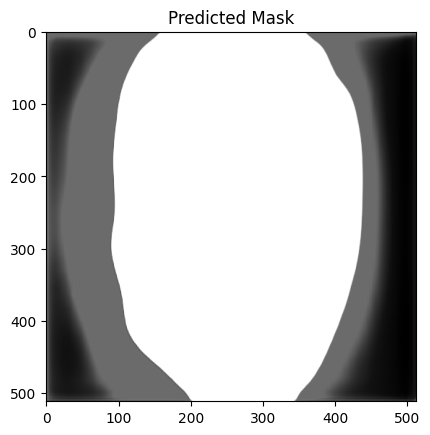

In [29]:
def predict_image(model, image_path):
    image = load_img(image_path, 512, 512)  # Ensure your load_img function is correctly adapted for single images
    image = np.expand_dims(image, axis=0)  # Add batch dimension
    prediction = model.predict(image)
    return prediction[0]

# Use the function
image_path = 'A. Segmentation/2. All Segmentation Groundtruths/b. Testing Set/2. Haemorrhages/IDRiD_57_HE.tif'
prediction = predict_image(loaded_model, image_path)
plt.imshow(prediction.squeeze(), cmap='gray')  # Assuming the prediction is a single-channel image
plt.title("Predicted Mask")
plt.show()


In [22]:
unique_labels = np.unique(y_test)
num_classes = len(unique_labels)
print(f"Unique labels in the ground truth: {unique_labels}")
print(f"Number of classes: {num_classes}")


Unique labels in the ground truth: [  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.
  14.  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.
  28.  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.
  42.  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.
  56.  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.
  70.  71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.
  84.  85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.  97.
  98.  99. 100. 101. 102. 103. 104. 105. 106. 107. 108. 109. 110. 111.
 112. 113. 114. 115. 116. 117. 118. 119. 120. 121. 122. 123. 124. 125.
 126. 127. 128. 129. 130. 131. 132. 133. 134. 135. 136. 137. 138. 139.
 140. 141. 142. 143. 144. 145. 146. 147. 148. 149. 150. 151. 152. 153.
 154. 155. 156. 157. 158. 159. 160. 161. 162. 163. 164. 165. 166. 167.
 168. 169. 170. 171. 172. 173. 174. 175. 176. 177. 178. 179. 180. 181.
 182. 183. 184. 185. 186. 187. 188. 189. 1